In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=22)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/15 | batch 2001/2000 | loss 1.2236 | val loss 1.2330 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 30.49s
train epoch 01/15 | batch 2001/2000 | loss 0.9016 | val loss 0.6970 | acc 0.8057 | f1 0.1636 | prec 0.9935 | recall 0.0891 | roc auc 0.5622 | pr auc 0.3836 | elapsed 90.54s
train epoch 02/15 | batch 2001/2000 | loss 0.5947 | val loss 0.5198 | acc 0.8232 | f1 0.3188 | prec 0.8910 | recall 0.1941 | roc auc 0.7125 | pr auc 0.5238 | elapsed 77.72s
train epoch 03/15 | batch 2001/2000 | loss 0.4572 | val loss 0.4246 | acc 0.8421 | f1 0.4840 | prec 0.7969 | recall 0.3475 | roc auc 0.8020 | pr auc 0.6434 | elapsed 71.78s
train epoch 04/15 | batch 2001/2000 | loss 0.3546 | val loss 0.3479 | acc 0.8716 | f1 0.6184 | prec 0.8438 | recall 0.4880 | roc auc 0.8579 | pr auc 0.7486 | elapsed 88.87s
train epoch 05/15 | batch 2001/2000 | loss 0.2759 |

In [4]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)

tensor([0.7046, 0.9691, 0.6363, 0.5471, 0.4491, 0.2415, 0.8017, 0.2631, 0.6155,
        0.7288])
tensor([0.7046, 0.9528, 0.6361, 0.5659, 0.4335, 0.2452, 0.8170, 0.2649, 0.6406,
        0.7322], grad_fn=<SqueezeBackward3>)


In [5]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-4.2432e-01,  2.1075e-01,  4.6699e-01, -1.5577e-01,  7.6044e-02,
         -2.3630e-01,  2.4645e-01,  4.2893e-01,  2.1328e-01,  1.7274e-01],
        [ 3.0274e-01, -3.5944e-01,  4.2619e-02,  1.3386e-02,  3.1835e-01,
          4.3048e-01,  3.8513e-01,  1.7166e-01,  4.6904e-01, -2.6025e-01],
        [ 5.7251e-01,  3.9439e-02, -6.0121e-04,  1.4567e-01, -1.7194e-02,
         -5.6191e-01, -3.0219e-01,  1.6808e-01,  2.4530e-01, -3.5003e-01],
        [-1.1905e-01,  9.8224e-04,  1.9469e-01, -4.5803e-01,  3.3767e-01,
         -3.2995e-01,  6.1691e-02, -5.1407e-01, -5.7584e-02, -5.1552e-01],
        [ 6.4414e-02,  3.3113e-01, -7.4901e-02,  3.1427e-01, -1.3997e-01,
         -1.8327e-01,  5.2368e-01, -4.9059e-01,  3.7942e-01,  3.7587e-01],
        [-3.0570e-01,  4.4794e-01, -6.6932e-01, -2.6941e-01, -1.5755e-01,
          1.3784e-01, -1.0238e-01,  1.3628e-01,  3.2850e-01, -2.5841e-01],
        [ 2.5227e-01,  3.6552e-01, -3.1254e-01,  1.7201e-01,  4.1998e-01,
         -

In [6]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*1000)/1000)

tensor([[ 1.0010e+00,  1.0000e-03, -1.0000e-03, -2.0000e-03, -1.0000e-03,
          1.0000e-03,  1.0000e-03,  2.0000e-03, -0.0000e+00, -0.0000e+00],
        [ 0.0000e+00,  1.0000e+00, -1.7000e-02, -5.0000e-03,  1.0000e-03,
         -1.4000e-02,  0.0000e+00,  6.0000e-03,  7.0000e-03, -9.0000e-03],
        [ 3.0000e-03,  0.0000e+00,  9.9800e-01, -2.0000e-03, -3.0000e-03,
          1.0000e-03,  0.0000e+00,  1.0000e-03,  2.0000e-03, -0.0000e+00],
        [ 1.0000e-03,  1.0000e-03,  1.5000e-02,  1.0070e+00, -0.0000e+00,
          1.5000e-02,  2.0000e-03, -5.0000e-03, -9.0000e-03,  8.0000e-03],
        [ 1.0000e-03, -0.0000e+00, -1.7000e-02, -3.0000e-03,  1.0010e+00,
         -1.6000e-02,  1.0000e-03,  3.0000e-03,  9.0000e-03, -9.0000e-03],
        [ 2.0000e-03, -0.0000e+00,  2.0000e-03,  1.0000e-03, -2.0000e-03,
          1.0020e+00,  2.0000e-03, -3.0000e-03, -1.0000e-03,  1.0000e-03],
        [ 0.0000e+00,  1.0000e-03,  1.2000e-02,  5.0000e-03, -1.0000e-03,
          1.1000e-02,  1.0060e+0

In [7]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    else:
        train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.2214 | val loss 1.2214 | acc 0.6422 | f1 0.3936 | prec 0.3116 | recall 0.5340 | roc auc 0.6481 | pr auc 0.4858 | elapsed 21.10s
train epoch 01/10 | batch 1251/1250 | loss 1.0250 | val loss 0.8006 | acc 0.7319 | f1 0.4742 | prec 0.4133 | recall 0.5561 | roc auc 0.7322 | pr auc 0.5627 | elapsed 42.78s
train epoch 02/10 | batch 1251/1250 | loss 0.6770 | val loss 0.5274 | acc 0.8073 | f1 0.5762 | prec 0.5521 | recall 0.6025 | roc auc 0.8150 | pr auc 0.6663 | elapsed 43.30s
train epoch 03/10 | batch 1251/1250 | loss 0.4594 | val loss 0.3663 | acc 0.8636 | f1 0.6784 | prec 0.6959 | recall 0.6617 | roc auc 0.8791 | pr auc 0.7685 | elapsed 43.68s
train epoch 04/10 | batch 1251/1250 | loss 0.3318 | val loss 0.2730 | acc 0.9002 | f1 0.7581 | prec 0.8016 | recall 0.7191 | roc auc 0.9206 | pr auc 0.8441 | elapsed 43.48s
train epoch 05/10 | batch 1251/1250 | loss 0.2567 | val loss 0.2173 | acc 0.9227 | f1 0.8106 | prec 0.8673 | recall 0.

In [8]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240625T192940


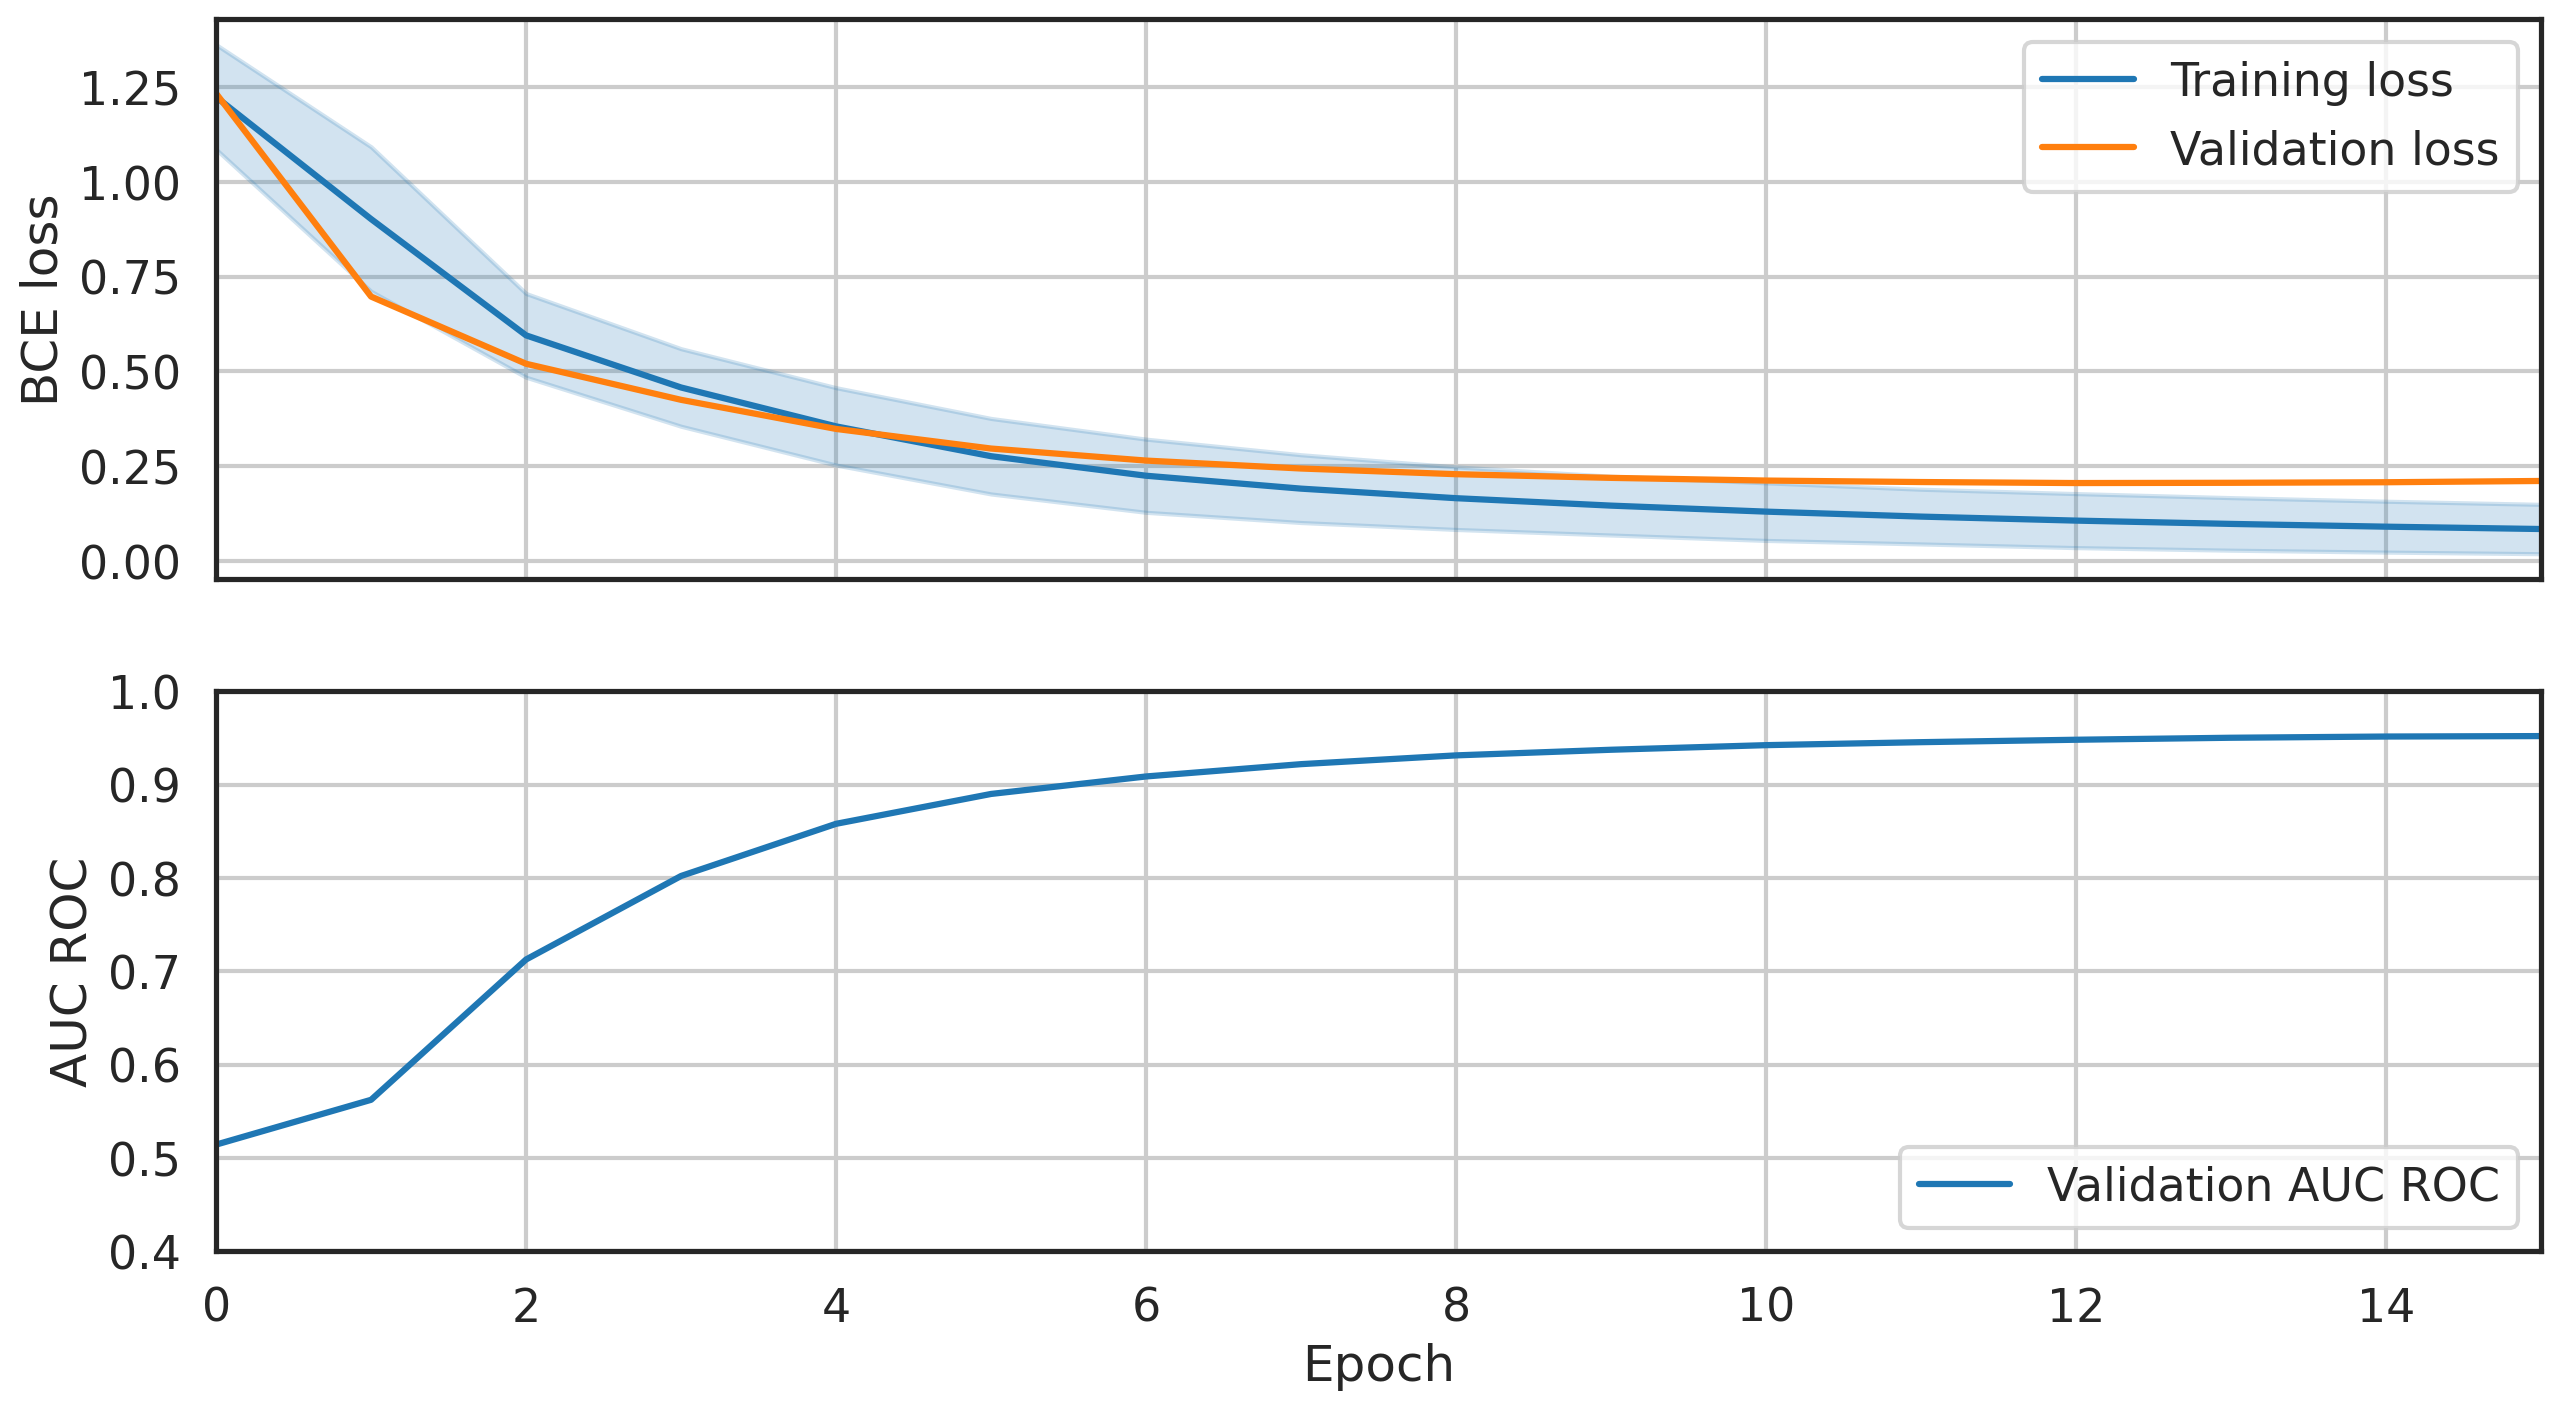

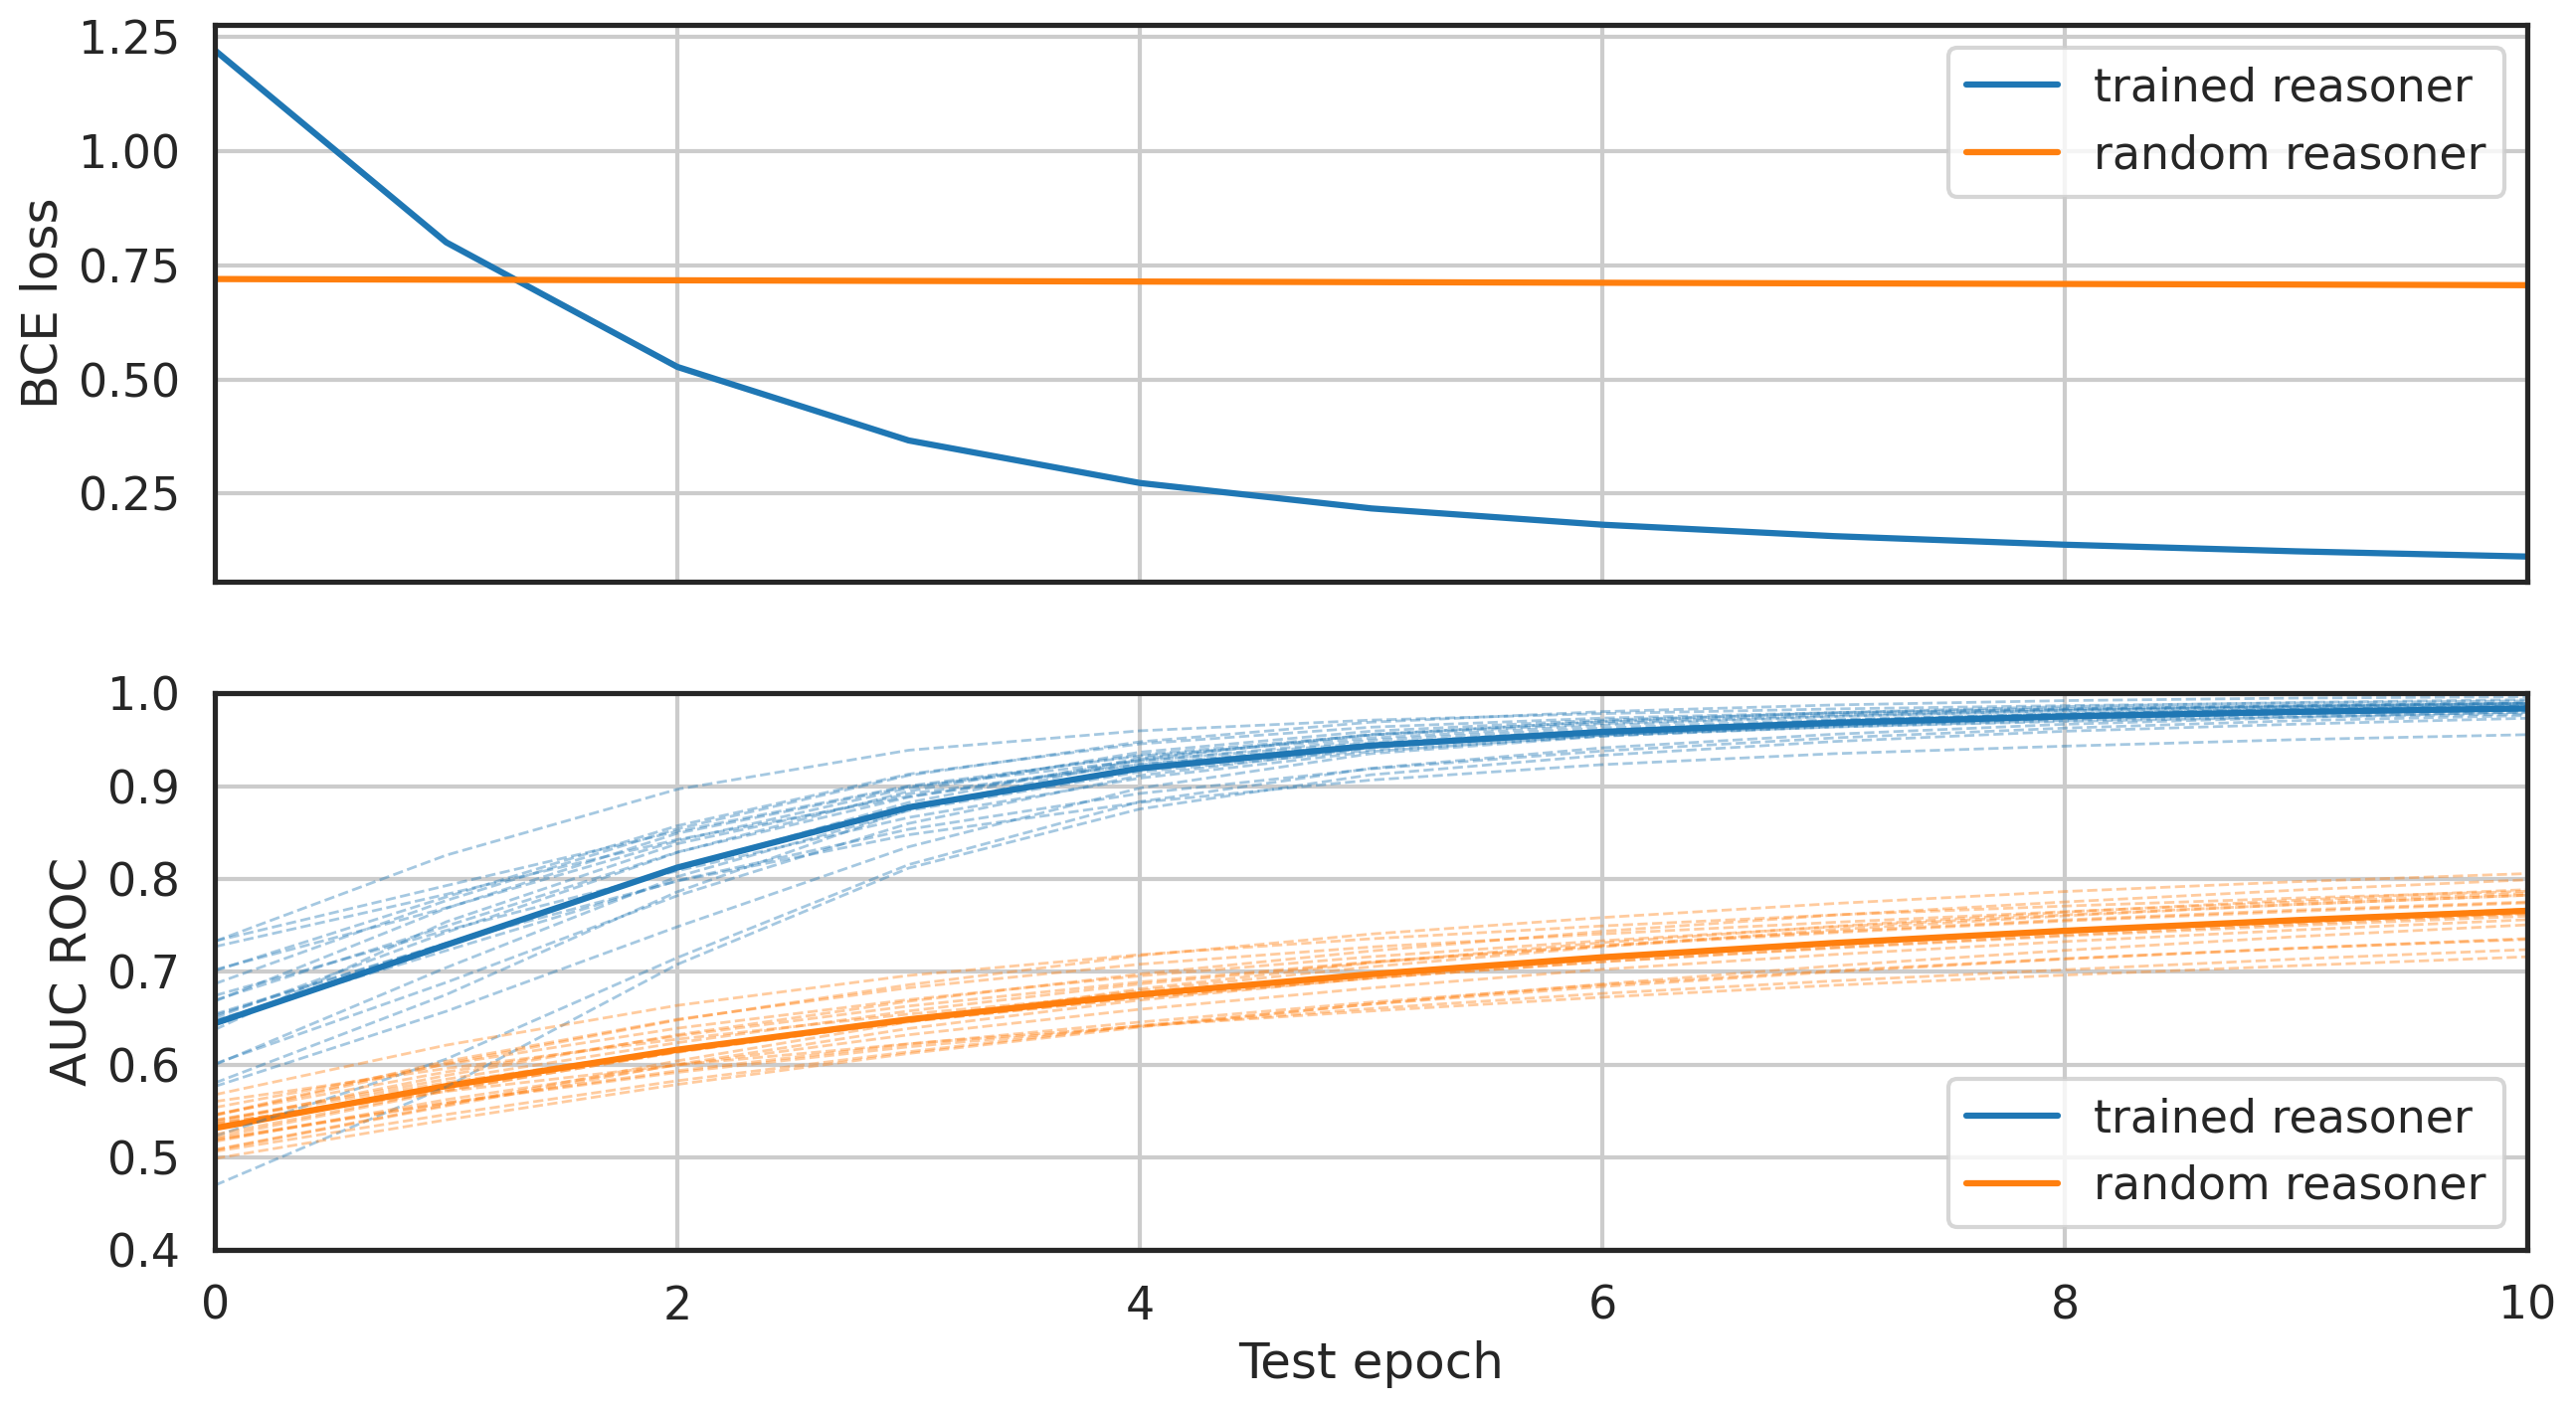

             mean       std     micro
acc      0.961550  0.016460  0.961550
prec     0.958060  0.030273  0.958141
recall   0.859162  0.049383  0.860741
f1       0.905599  0.039037  0.906833
auc_roc  0.983647  0.008963  0.984663
auc_pr   0.963236  0.018545  0.965689
             mean       std     micro
acc      0.287375  0.027590  0.287375
prec     0.231894  0.030550  0.232159
recall   0.987012  0.012017  0.987236
f1       0.374628  0.039972  0.375917
auc_roc  0.765613  0.024266  0.766383
auc_pr   0.558881  0.052247  0.563443


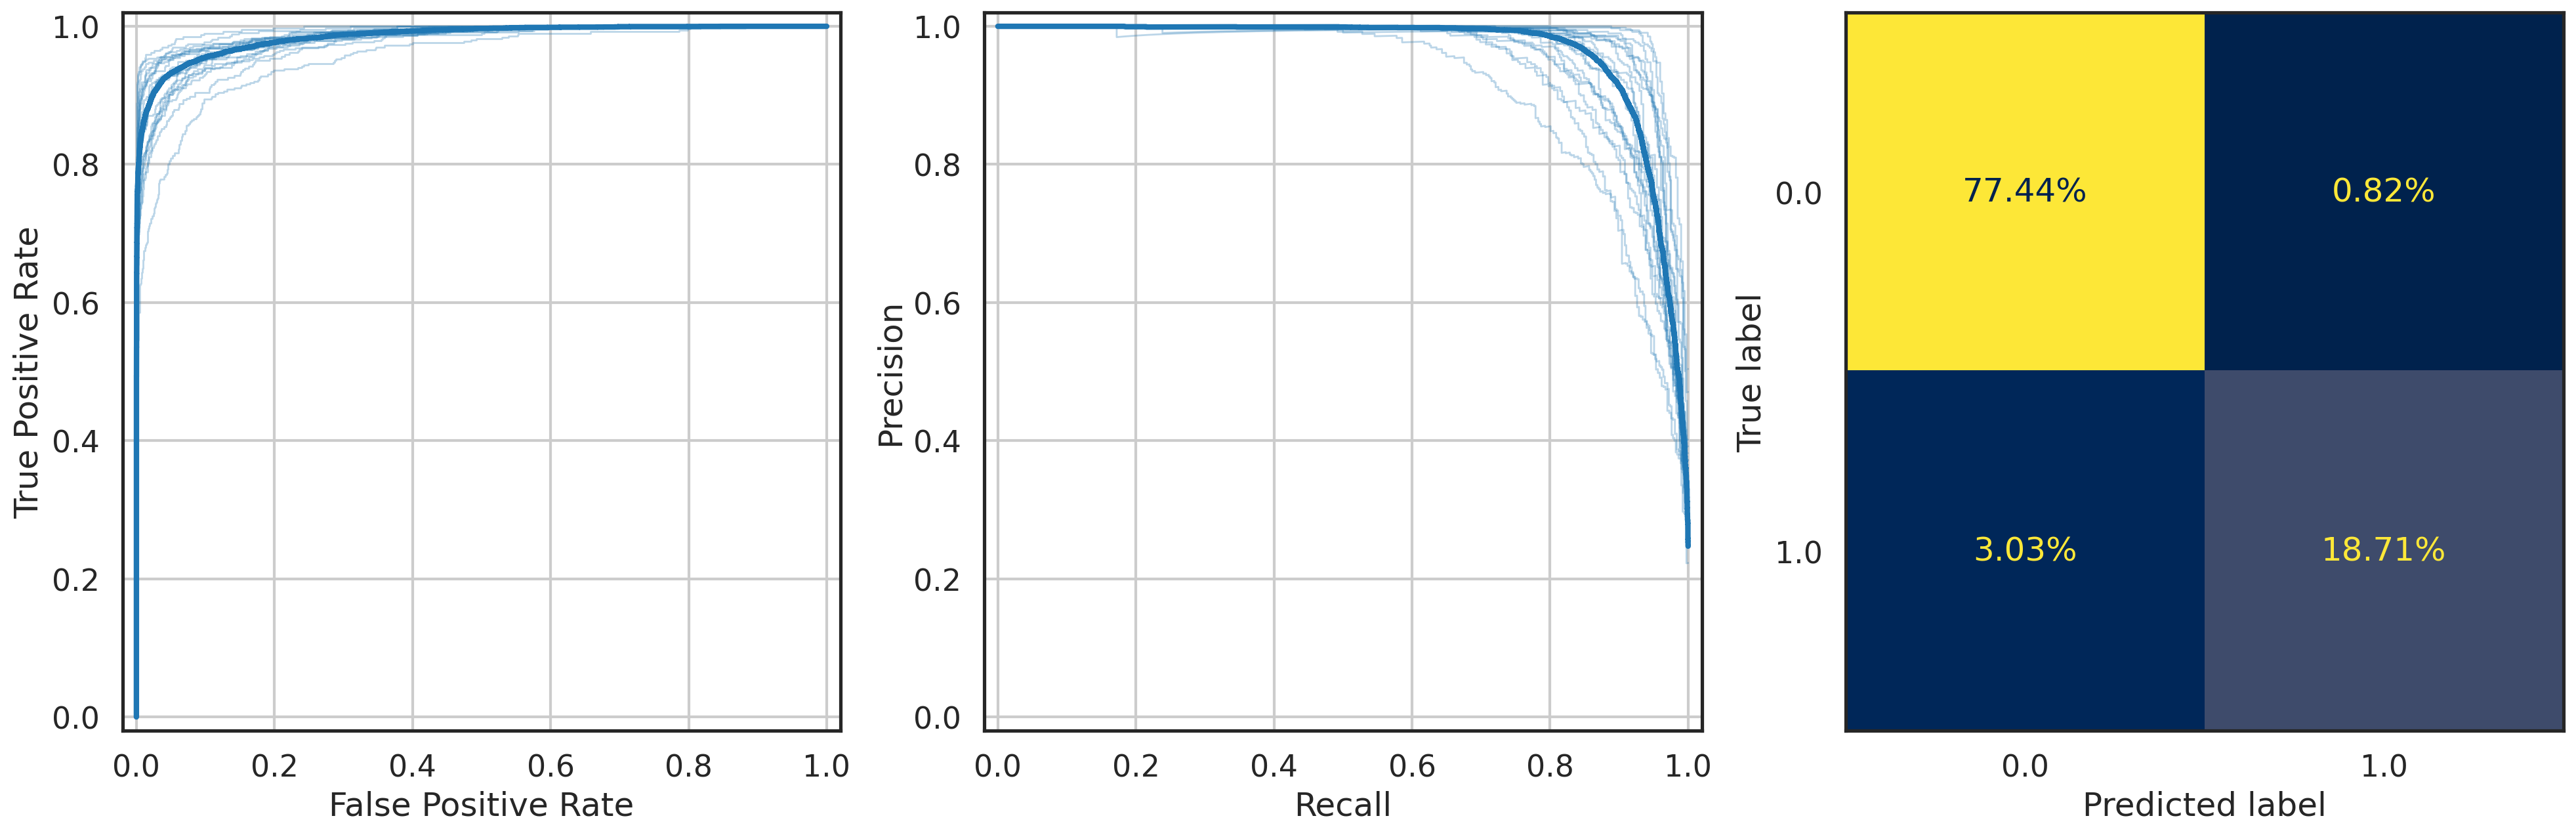

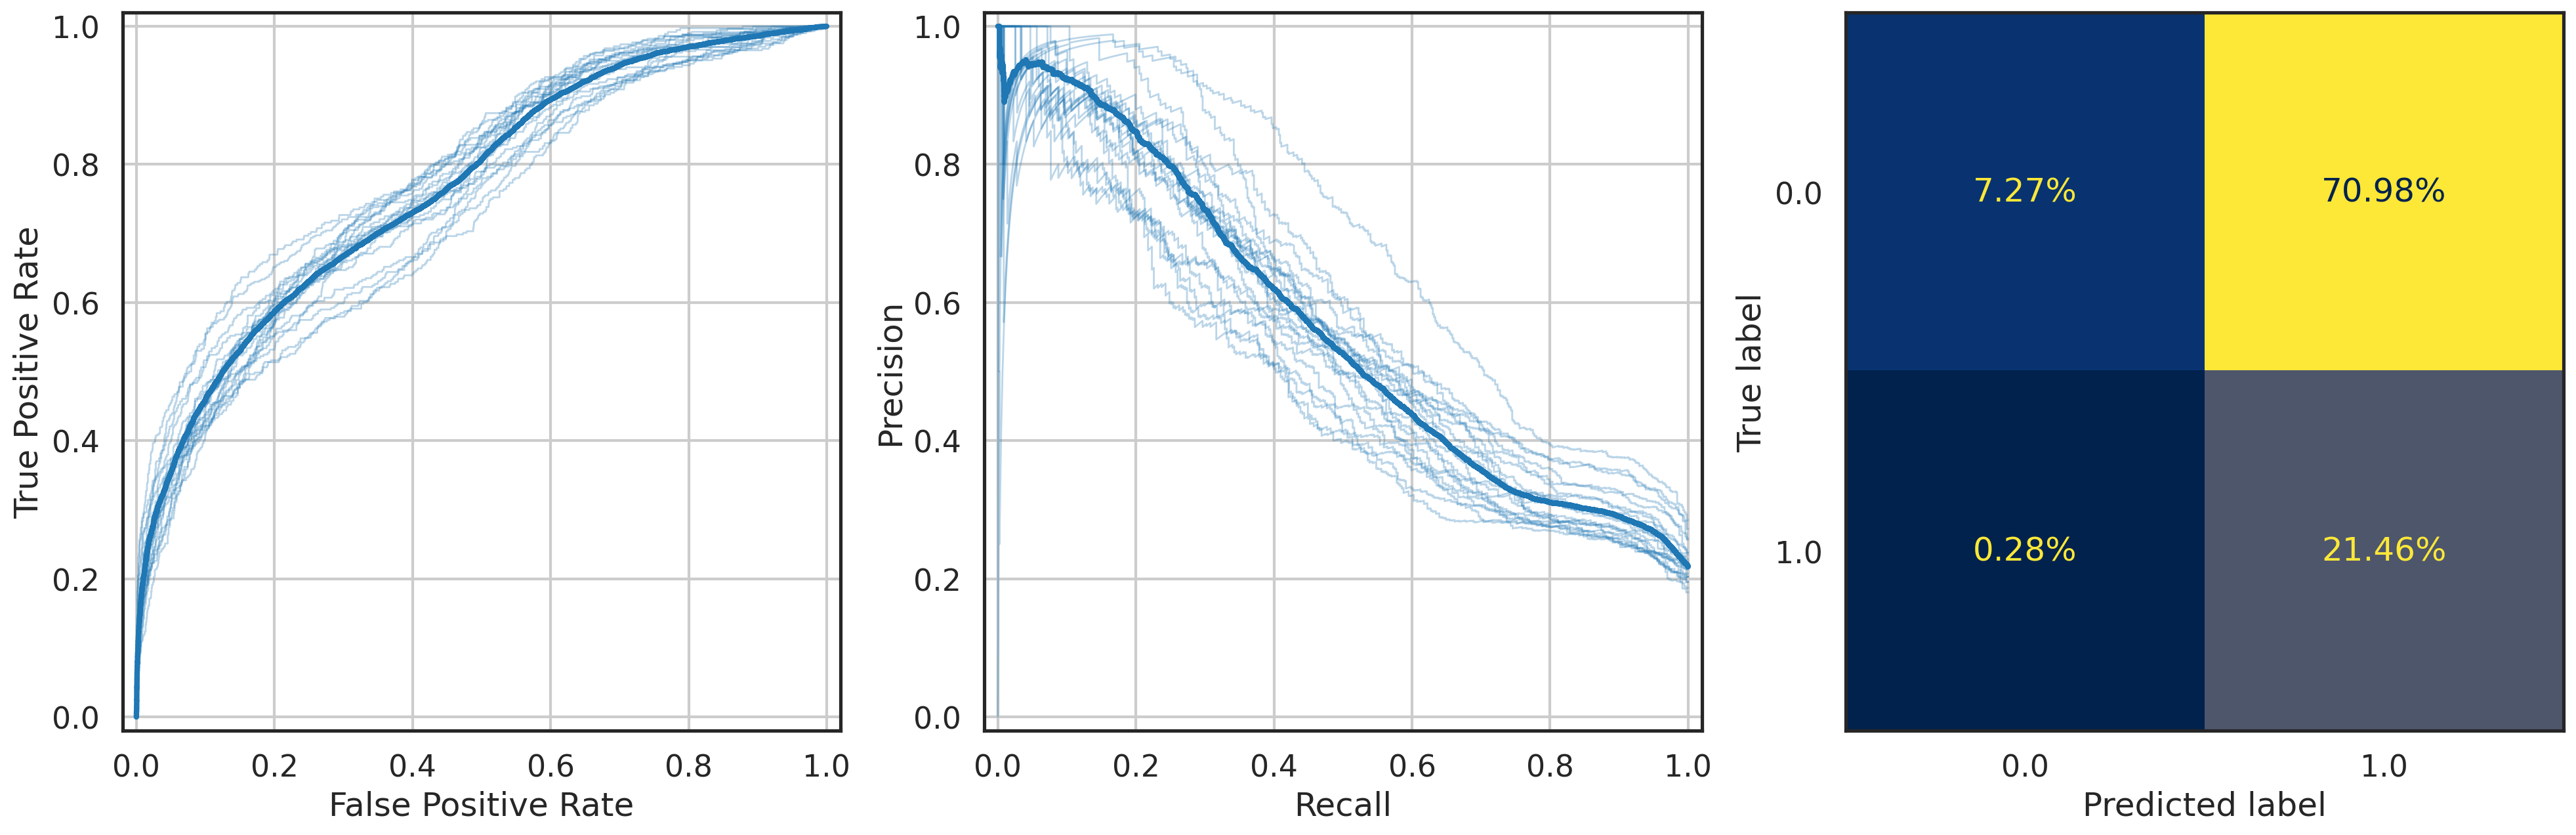

In [9]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))